# Loading in Residual Count Dataset

- each value shows gene expression via RNA sequencing

In [55]:
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv('data/RNAseqHarm/MSBB_Residualized_counts_(diagnosis-sex-age-death).tsv', delimiter="\t")
df1 = pd.read_csv('data/RNAseqHarm/RNAseq_Harmonization_MSBB_combined_metadata.csv')

In [57]:
df2 = df.copy()
df2 = df2.rename(columns={'feature':'index'})
df2 = df2.set_index('index').T
df2.reset_index(inplace=True)
df2.rename(columns={'index':'ID'}, inplace=True)

In [58]:
df2.shape

(1247, 22737)

In [59]:
df2['ID']

0                  BM_22_213
1                  BM_22_222
2                  BM_22_229
3                  BM_22_230
4                  BM_22_231
                ...         
1242     hB_RNA_9180_L43C014
1243     hB_RNA_9187_L43C014
1244    hB_RNA_9189_E007C014
1245     hB_RNA_9191_L43C014
1246     hB_RNA_9208_L43C014
Name: ID, Length: 1247, dtype: object

In [60]:
df1['specimenID'].value_counts().head()

hB_RNA_8285     1
hB_RNA_13351    1
BM_36_347       1
BM_10_739       1
BM_10_729       1
Name: specimenID, dtype: int64

In [61]:
df1.columns

Index(['specimenID', 'platform', 'RIN', 'sequencingBatch', 'libraryPrep',
       'libraryPreparationMethod', 'runType', 'readLength', 'barcode',
       'totalReads', 'mapped', 'rRNA.rate', 'individualID', 'organ', 'tissue',
       'BrodmannArea', 'assay', 'isPostMortem', 'exclude', 'excludeReason',
       'individualIdSource', 'species', 'sex', 'race', 'ethnicity', 'ageDeath',
       'apoeGenotype', 'pmi', 'CERAD', 'Braak', 'CDR', 'plaqueMean'],
      dtype='object')

In [62]:
df1.head()

,specimenID,platform,RIN,sequencingBatch,libraryPrep,libraryPreparationMethod,runType,readLength,barcode,totalReads,...,sex,race,ethnicity,ageDeath,apoeGenotype,pmi,CERAD,Braak,CDR,plaqueMean
0,hB_RNA_8285,HiSeq2500,3.9,E3C014,rRNAdepletion,TruSeq,singleEnd,100,8285,3791354,...,female,W,W,90+,NaN,317.0,2.0,6.0,3.0,NaN
1,hB_RNA_8295,HiSeq2500,8.1,E3C014,rRNAdepletion,TruSeq,singleEnd,100,8295,4079721,...,female,W,W,90+,NaN,115.0,2.0,6.0,3.0,NaN
2,hB_RNA_8255,HiSeq2500,3.7,E3C014,rRNAdepletion,TruSeq,singleEnd,100,8255,4312147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hB_RNA_8215_resequenced,HiSeq2500,7.7,B18C014,rRNAdepletion,TruSeq,singleEnd,100,8215,4458895,...,female,W,W,90+,NaN,160.0,3.0,5.0,5.0,NaN
4,hB_RNA_10242,HiSeq2500,10.0,E3C014,rRNAdepletion,TruSeq,singleEnd,100,10242,4838300,...,female,W,W,90+,NaN,710.0,2.0,5.0,3.0,NaN


In [63]:
dfy = df1

In [64]:
dfy['tissue'].value_counts()

superior temporal gyrus    334
parahippocampal gyrus      315
frontal pole               310
inferior frontal gyrus     308
prefrontal cortex           15
Name: tissue, dtype: int64

In [65]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   specimenID                1282 non-null   object 
 1   platform                  1282 non-null   object 
 2   RIN                       1282 non-null   float64
 3   sequencingBatch           1282 non-null   object 
 4   libraryPrep               1282 non-null   object 
 5   libraryPreparationMethod  1282 non-null   object 
 6   runType                   1282 non-null   object 
 7   readLength                1282 non-null   int64  
 8   barcode                   1282 non-null   int64  
 9   totalReads                1282 non-null   int64  
 10  mapped                    1282 non-null   int64  
 11  rRNA.rate                 1282 non-null   float64
 12  individualID              1259 non-null   object 
 13  organ                     1282 non-null   object 
 14  tissue  

In [66]:
dfy = dfy[dfy['excludeReason'].isnull()]

In [67]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1281
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   specimenID                1259 non-null   object 
 1   platform                  1259 non-null   object 
 2   RIN                       1259 non-null   float64
 3   sequencingBatch           1259 non-null   object 
 4   libraryPrep               1259 non-null   object 
 5   libraryPreparationMethod  1259 non-null   object 
 6   runType                   1259 non-null   object 
 7   readLength                1259 non-null   int64  
 8   barcode                   1259 non-null   int64  
 9   totalReads                1259 non-null   int64  
 10  mapped                    1259 non-null   int64  
 11  rRNA.rate                 1259 non-null   float64
 12  individualID              1259 non-null   object 
 13  organ                     1259 non-null   object 
 14  tissue  

In [68]:
dfy = dfy.drop(columns=['exclude', 'excludeReason'])

In [69]:
dfy = dfy.drop(columns=['organ', 'BrodmannArea'])

In [70]:
dfy.columns

Index(['specimenID', 'platform', 'RIN', 'sequencingBatch', 'libraryPrep',
       'libraryPreparationMethod', 'runType', 'readLength', 'barcode',
       'totalReads', 'mapped', 'rRNA.rate', 'individualID', 'tissue', 'assay',
       'isPostMortem', 'individualIdSource', 'species', 'sex', 'race',
       'ethnicity', 'ageDeath', 'apoeGenotype', 'pmi', 'CERAD', 'Braak', 'CDR',
       'plaqueMean'],
      dtype='object')

In [71]:
dfy['CERAD'].value_counts()

2.0    567
1.0    353
3.0    175
4.0    164
Name: CERAD, dtype: int64

In [72]:
dfy['CDR'].value_counts()

3.0    295
2.0    188
0.5    174
5.0    164
0.0    163
4.0    153
1.0    122
Name: CDR, dtype: int64

In [73]:
dfy['Braak'].value_counts()

6.0    419
3.0    234
2.0    173
5.0    145
4.0    128
1.0    110
0.0     50
Name: Braak, dtype: int64

In [74]:
dfy['apoeGenotype'].value_counts()

33.0    405
34.0    210
23.0     74
44.0     18
22.0      9
24.0      8
Name: apoeGenotype, dtype: int64

In [75]:
dfy = dfy[['specimenID','CERAD', 'sex', 'tissue']]

In [76]:
dfy =  dfy.copy()
dfy['HasAlzheimer'] = dfy['CERAD'].apply(lambda x: 1 if x in [3, 4] else 0 if x == 1 else np.nan)

In [77]:
dfy.head(5)

,specimenID,CERAD,sex,tissue,HasAlzheimer
0,hB_RNA_8285,2.0,female,superior temporal gyrus,NaN
1,hB_RNA_8295,2.0,female,superior temporal gyrus,NaN
3,hB_RNA_8215_resequenced,3.0,female,superior temporal gyrus,1.0
4,hB_RNA_10242,2.0,female,superior temporal gyrus,NaN
5,hB_RNA_12201,2.0,female,superior temporal gyrus,NaN


In [78]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1281
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   specimenID    1259 non-null   object 
 1   CERAD         1259 non-null   float64
 2   sex           1259 non-null   object 
 3   tissue        1259 non-null   object 
 4   HasAlzheimer  692 non-null    float64
dtypes: float64(2), object(3)
memory usage: 59.0+ KB


In [79]:
dfy = dfy.dropna()

In [80]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 3 to 1276
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   specimenID    692 non-null    object 
 1   CERAD         692 non-null    float64
 2   sex           692 non-null    object 
 3   tissue        692 non-null    object 
 4   HasAlzheimer  692 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.4+ KB


In [81]:
dfx = pd.merge(dfy, df2, left_on='specimenID', right_on='ID', how='inner')

In [82]:
dfx['specimenID'].value_counts()

hB_RNA_8215_resequenced    1
hB_RNA_11062               1
BM_36_412                  1
BM_10_786                  1
hB_RNA_16675               1
                          ..
hB_RNA_10452               1
hB_RNA_16325               1
BM_36_310                  1
hB_RNA_16275               1
hB_RNA_9202                1
Name: specimenID, Length: 688, dtype: int64

In [83]:
dfx = dfx.drop_duplicates(subset='specimenID')

In [84]:
dfx.shape

(688, 22742)

In [85]:
dfx['specimenID'].value_counts()

hB_RNA_8215_resequenced    1
hB_RNA_11062               1
BM_36_412                  1
BM_10_786                  1
hB_RNA_16675               1
                          ..
hB_RNA_10452               1
hB_RNA_16325               1
BM_36_310                  1
hB_RNA_16275               1
hB_RNA_9202                1
Name: specimenID, Length: 688, dtype: int64

In [86]:
dfx.head()

,specimenID,CERAD,sex,tissue,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
0,hB_RNA_8215_resequenced,3.0,female,superior temporal gyrus,1.0,hB_RNA_8215_resequenced,0.167909,-0.094559,-0.346721,0.484645,...,-0.969141,-0.216251,-0.664994,1.292460,0.570736,-1.259777,-1.122068,0.661029,-0.273467,0.175395
1,hB_RNA_10232,4.0,female,superior temporal gyrus,1.0,hB_RNA_10232,-0.618093,0.621614,0.382008,0.499679,...,0.680694,-0.562363,-0.030826,0.843418,1.030459,2.266263,1.413027,0.952348,0.448241,-0.063037
2,hB_RNA_9209_resequenced,1.0,male,superior temporal gyrus,0.0,hB_RNA_9209_resequenced,0.365082,0.038707,-0.086143,-0.124001,...,1.097475,0.478875,-0.454923,0.901341,0.478493,1.424014,0.511248,1.027829,0.909928,0.621988
3,hB_RNA_7765_resequenced,3.0,male,superior temporal gyrus,1.0,hB_RNA_7765_resequenced,-0.830482,-0.005038,-0.225544,0.090561,...,0.570291,0.255780,1.127954,-0.616474,1.327920,1.022000,0.118060,0.644416,0.754178,0.414141
4,hB_RNA_12262,1.0,female,parahippocampal gyrus,0.0,hB_RNA_12262,0.265410,-0.278092,-0.153005,0.165808,...,0.834162,0.414609,0.993359,0.782581,0.759129,0.551303,-0.260356,0.751617,-0.892354,0.090862


In [87]:
dfx.shape

(688, 22742)

In [93]:
dfx.head()

,specimenID,CERAD,sex,tissue,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
0,hB_RNA_8215_resequenced,3.0,0,superior temporal gyrus,1.0,hB_RNA_8215_resequenced,0.167909,-0.094559,-0.346721,0.484645,...,-0.969141,-0.216251,-0.664994,1.292460,0.570736,-1.259777,-1.122068,0.661029,-0.273467,0.175395
1,hB_RNA_10232,4.0,0,superior temporal gyrus,1.0,hB_RNA_10232,-0.618093,0.621614,0.382008,0.499679,...,0.680694,-0.562363,-0.030826,0.843418,1.030459,2.266263,1.413027,0.952348,0.448241,-0.063037
2,hB_RNA_9209_resequenced,1.0,1,superior temporal gyrus,0.0,hB_RNA_9209_resequenced,0.365082,0.038707,-0.086143,-0.124001,...,1.097475,0.478875,-0.454923,0.901341,0.478493,1.424014,0.511248,1.027829,0.909928,0.621988
3,hB_RNA_7765_resequenced,3.0,1,superior temporal gyrus,1.0,hB_RNA_7765_resequenced,-0.830482,-0.005038,-0.225544,0.090561,...,0.570291,0.255780,1.127954,-0.616474,1.327920,1.022000,0.118060,0.644416,0.754178,0.414141
4,hB_RNA_12262,1.0,0,parahippocampal gyrus,0.0,hB_RNA_12262,0.265410,-0.278092,-0.153005,0.165808,...,0.834162,0.414609,0.993359,0.782581,0.759129,0.551303,-0.260356,0.751617,-0.892354,0.090862


In [89]:
dfx['tissue'].value_counts()

superior temporal gyrus    177
frontal pole               173
inferior frontal gyrus     167
parahippocampal gyrus      165
prefrontal cortex            6
Name: tissue, dtype: int64

In [90]:
dfx['sex'] = dfx['sex'].map({'female': 0, 'male': 1})

In [94]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [95]:
from umap import UMAP
import seaborn as sns

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [98]:
from keras import models
from keras import layers
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [100]:
from tqdm import tqdm

In [101]:
dfx.head(1)

,specimenID,CERAD,sex,tissue,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
0,hB_RNA_8215_resequenced,3.0,0,superior temporal gyrus,1.0,hB_RNA_8215_resequenced,0.167909,-0.094559,-0.346721,0.484645,...,-0.969141,-0.216251,-0.664994,1.29246,0.570736,-1.259777,-1.122068,0.661029,-0.273467,0.175395


In [91]:
dfx.to_csv('dfxMSBB.csv', index=False) 

In [102]:
X = dfx.drop(['specimenID', 'CERAD', 'HasAlzheimer', 'ID'], axis=1)  
y = dfx['HasAlzheimer']

categorical_cols = ['tissue']  # Add other categorical column names if needed

# Define numerical columns
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [104]:
print(X.columns)

Index(['sex', 'tissue', 'ENSG00000000003', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       ...
       'ENSG00000288077', 'ENSG00000288079', 'ENSG00000288085',
       'ENSG00000288090', 'ENSG00000288091', 'ENSG00000288095',
       'ENSG00000288100', 'ENSG00000288105', 'ENSG00000288107',
       'ENSG00000288110'],
      dtype='object', length=22738)


In [105]:
all_floats = ((X.dtypes == 'float64') | (X.dtypes == 'float32')).all()
print(all_floats)

False


In [106]:
all_floats = ((X[numerical_cols].dtypes == 'float64') | (X[numerical_cols].dtypes == 'float32')).all()
print(all_floats)

True


In [107]:
not_floats = X.dtypes[~((X.dtypes == 'float64') | (X.dtypes == 'float32'))]
print(not_floats)

tissue    object
dtype: object


In [108]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

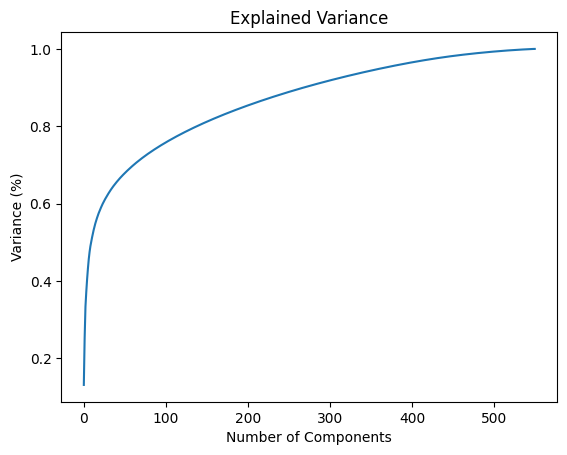

In [110]:
# Fit PCA on your preprocessed data
pca = PCA().fit(X_train_preprocessed)

# Plot the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_51679/2238343830.py:12: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='UMAP 1', ylabel='UMAP 2'>

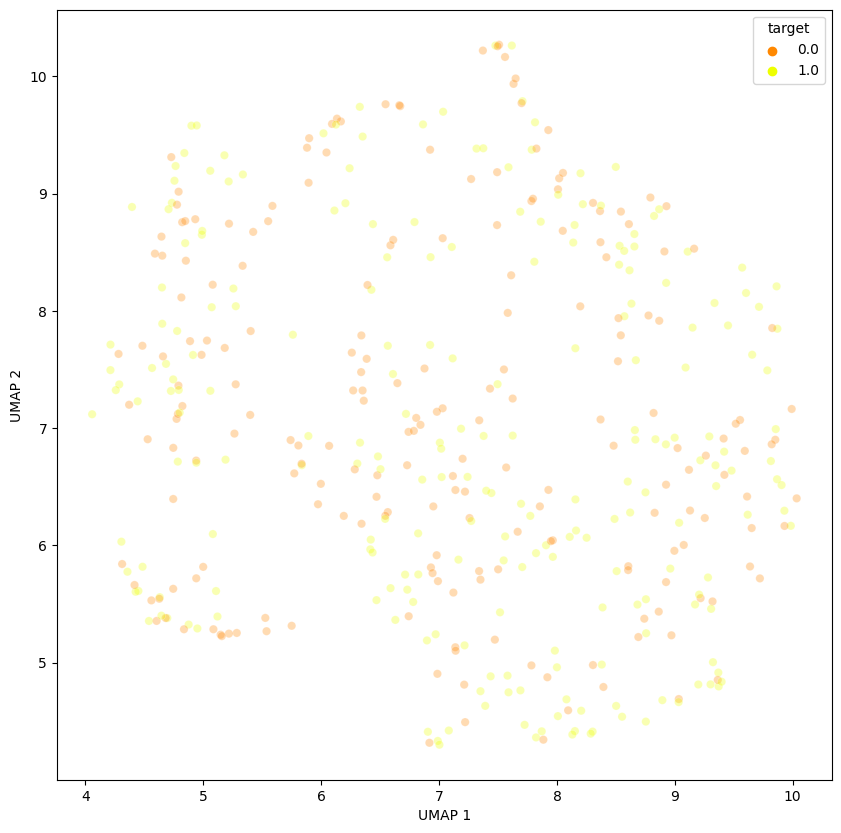

In [111]:
# Fit UMAP on your preprocessed data
umap = UMAP(n_components=2).fit_transform(preprocessor.transform(X_train))

# Create a DataFrame for visualization
umap_df = pd.DataFrame(data = umap, columns = ['UMAP 1', 'UMAP 2'])

# Add target variable for coloring
umap_df['target'] = y_train

# Scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="UMAP 1", y="UMAP 2",
    hue="target",
    palette=sns.color_palette("hsv", 10),
    data=umap_df,
    legend="full",
    alpha=0.3
)

# Now to Modeling!

In [112]:
# Define the model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)


# Create and evaluate the pipeline
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model1)
                       ])

# Fit and predict
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 76.09%


In [113]:

print(classification_report(y_test, y_pred1))

print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78        75
         1.0       0.73      0.75      0.74        63

    accuracy                           0.76       138
   macro avg       0.76      0.76      0.76       138
weighted avg       0.76      0.76      0.76       138

[[58 17]
 [16 47]]


In [135]:
model2 = LogisticRegression(max_iter=1000)
umap = UMAP(n_components=25) # Again, choose n_components based on your requirements.

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('umap', umap),
                        ('model', model2)
                       ])

[CV] END model__C=0.001, model__penalty=l1, model__solver=newton-cg; total time=   2.6s
[CV] END model__C=0.001, model__penalty=l1, model__solver=sag; total time=   2.2s
[CV] END model__C=0.001, model__penalty=l2, model__solver=newton-cg; total time=   2.9s
[CV] END model__C=0.001, model__penalty=l2, model__solver=liblinear; total time=   2.6s
[CV] END model__C=0.001, model__penalty=l2, model__solver=saga; total time=   2.3s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=liblinear; total time=   2.3s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=saga; total time=   1.4s
[CV] END model__C=0.01, model__penalty=l1, model__solver=lbfgs; total time=   1.2s
[CV] END model__C=0.01, model__penalty=l1, model__solver=sag; total time=   1.1s
[CV] END model__C=0.01, model__penalty=l1, model__solver=saga; total time=   1.5s
[CV] END model__C=0.01, model__penalty=l2, model__solver=lbfgs; total time=   1.7s
[CV] END model__C=0.01, model__penalty=l2, model__solve

[CV] END model__C=0.001, model__penalty=l1, model__solver=newton-cg; total time=   2.3s
[CV] END model__C=0.001, model__penalty=l1, model__solver=liblinear; total time=   2.4s
[CV] END model__C=0.001, model__penalty=l2, model__solver=newton-cg; total time=   2.9s
[CV] END model__C=0.001, model__penalty=l2, model__solver=liblinear; total time=   2.6s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=newton-cg; total time=   2.1s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=liblinear; total time=   1.9s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=saga; total time=   1.4s
[CV] END model__C=0.01, model__penalty=l1, model__solver=lbfgs; total time=   1.4s
[CV] END model__C=0.01, model__penalty=l1, model__solver=liblinear; total time=   1.8s
[CV] END model__C=0.01, model__penalty=l2, model__solver=newton-cg; total time=   1.5s
[CV] END model__C=0.01, model__penalty=l2, model__solver=lbfgs; total time=   1.6s
[CV] END model__C=0.01, m

[CV] END model__C=0.001, model__penalty=l1, model__solver=lbfgs; total time=   2.2s
[CV] END model__C=0.001, model__penalty=l1, model__solver=liblinear; total time=   1.9s
[CV] END model__C=0.001, model__penalty=l1, model__solver=saga; total time=   2.0s
[CV] END model__C=0.001, model__penalty=l2, model__solver=lbfgs; total time=   1.9s
[CV] END model__C=0.001, model__penalty=l2, model__solver=sag; total time=   1.7s
[CV] END model__C=0.001, model__penalty=l2, model__solver=saga; total time=   1.8s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=lbfgs; total time=   1.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=sag; total time=   1.9s
[CV] END model__C=0.01, model__penalty=l1, model__solver=newton-cg; total time=   1.3s
[CV] END model__C=0.01, model__penalty=l1, model__solver=lbfgs; total time=   1.2s
[CV] END model__C=0.01, model__penalty=l1, model__solver=sag; total time=   1.3s
[CV] END model__C=0.01, model__penalty=l1, model__solver=saga; 

In [115]:
model2 = LogisticRegression(max_iter=1000)
pca = PCA(n_components=20)

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', pca),
                        ('model', model2)
                       ])


In [116]:
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.91%


In [117]:

print(classification_report(y_test, y_pred2))

print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.81      0.68      0.74        75
         1.0       0.68      0.81      0.74        63

    accuracy                           0.74       138
   macro avg       0.74      0.74      0.74       138
weighted avg       0.75      0.74      0.74       138

[[51 24]
 [12 51]]


In [118]:
model3 = xgb.XGBClassifier()

pipe3 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model3)
                       ])


In [119]:

pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.36%


In [120]:

print(classification_report(y_test, y_pred3))

print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.83      0.69      0.75        75
         1.0       0.69      0.83      0.75        63

    accuracy                           0.75       138
   macro avg       0.76      0.76      0.75       138
weighted avg       0.77      0.75      0.75       138

[[52 23]
 [11 52]]


In [121]:
from keras import regularizers
from scikeras.wrappers import KerasClassifier

In [122]:
X.shape

(688, 22738)

In [123]:
X['tissue'].value_counts()

superior temporal gyrus    177
frontal pole               173
inferior frontal gyrus     167
parahippocampal gyrus      165
prefrontal cortex            6
Name: tissue, dtype: int64

In [124]:
def create_model():
    model4 = models.Sequential()
    model4.add(layers.Dense(512, activation='relu', input_shape=(22742,)))
    model4.add(layers.Dense(256, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(128, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(1, activation='sigmoid'))

    model4.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
    return model4


In [125]:
model5 = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=2)

In [126]:

pipe5 = Pipeline(steps=[('preprocessor', preprocessor),
            
                        ('model', model5)
                       ])


In [127]:
pipe5.fit(X_train, y_train)
y_pred5 = pipe5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2023-07-31 16:25:06.450802: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-31 16:25:06.454689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2 Pro
Epoch 1/50


2023-07-31 16:25:06.760424: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-31 16:25:06.997393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


55/55 - 2s - loss: 0.9746 - acc: 0.5491 - 2s/epoch - 32ms/step
Epoch 2/50
55/55 - 1s - loss: 0.7847 - acc: 0.6127 - 602ms/epoch - 11ms/step
Epoch 3/50
55/55 - 1s - loss: 0.7279 - acc: 0.6473 - 590ms/epoch - 11ms/step
Epoch 4/50
55/55 - 1s - loss: 0.6892 - acc: 0.6400 - 586ms/epoch - 11ms/step
Epoch 5/50
55/55 - 1s - loss: 0.6886 - acc: 0.6600 - 591ms/epoch - 11ms/step
Epoch 6/50
55/55 - 1s - loss: 0.6166 - acc: 0.6745 - 599ms/epoch - 11ms/step
Epoch 7/50
55/55 - 1s - loss: 0.5587 - acc: 0.7273 - 596ms/epoch - 11ms/step
Epoch 8/50
55/55 - 1s - loss: 0.5262 - acc: 0.7436 - 593ms/epoch - 11ms/step
Epoch 9/50
55/55 - 1s - loss: 0.4971 - acc: 0.7618 - 599ms/epoch - 11ms/step
Epoch 10/50
55/55 - 1s - loss: 0.4215 - acc: 0.8255 - 585ms/epoch - 11ms/step
Epoch 11/50
55/55 - 1s - loss: 0.3907 - acc: 0.8382 - 571ms/epoch - 10ms/step
Epoch 12/50
55/55 - 1s - loss: 0.4337 - acc: 0.8073 - 590ms/epoch - 11ms/step
Epoch 13/50
55/55 - 1s - loss: 0.3393 - acc: 0.8473 - 591ms/epoch - 11ms/step
Epoch 14/

2023-07-31 16:25:37.635798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 - 0s - 251ms/epoch - 18ms/step
Accuracy: 62.32%


In [128]:
y_pred_proba = pipe5.predict(X_test)
y_pred5 = np.where(y_pred_proba > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


14/14 - 0s - 67ms/epoch - 5ms/step
Accuracy: 62.32%


In [129]:

print(classification_report(y_test, y_pred5))

print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.68      0.57      0.62        75
         1.0       0.57      0.68      0.62        63

    accuracy                           0.62       138
   macro avg       0.63      0.63      0.62       138
weighted avg       0.63      0.62      0.62       138

[[43 32]
 [20 43]]


In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the parameter grid for logistic regression with penalty
param_grid_with_penalty = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Define the parameter grid for logistic regression without penalty
param_grid_without_penalty = {
    'model__penalty': [None],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create a base model
logreg = LogisticRegression(max_iter=10000)

pca = PCA(n_components=20)

# Create pipeline
pipe6 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', pca),
                        ('model', logreg)
                       ])

# Instantiate the grid search model
grid_search_with_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_with_penalty, cv=5, n_jobs=-1, verbose=2)
grid_search_without_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_without_penalty, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_with_penalty.fit(X_train, y_train)
grid_search_without_penalty.fit(X_train, y_train)

# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)


Fitting 5 folds for each of 105 candidates, totalling 525 fits


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters with penalty: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'lbfgs'}
Best score with penalty: 0.7127272727272727
Best score without penalty: 0.7109090909090909


In [131]:
# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)

Best parameters with penalty: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'lbfgs'}
Best score with penalty: 0.7127272727272727
Best score without penalty: 0.7109090909090909


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30, None],
    'model__max_features': ['sqrt', 'log2', 0.5],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 5]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Create pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', rf)
                       ])

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   7.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=   2.8s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   5.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=10, model__n_estimators=100; total time=   2.8s


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [132]:
# Get the best parameters from the grid search
best_params = grid_search_with_penalty.best_params_

# Adjust the parameters by removing 'model__'
best_params_adjusted = {k.replace('model__', ''): v for k, v in best_params.items()}

# Fit a new model using the best parameters from the grid search
best_model = LogisticRegression()

pca = PCA(n_components=20)

# Create and evaluate the pipeline
pipe7 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', pca),
                        ('model', best_model)
                       ])

# Fit and predict
pipe7.fit(X_train, y_train)
y_pred7 = pipe7.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred7))

print(confusion_matrix(y_test, y_pred7))


Accuracy: 74.64%
              precision    recall  f1-score   support

         0.0       0.82      0.68      0.74        75
         1.0       0.68      0.83      0.75        63

    accuracy                           0.75       138
   macro avg       0.75      0.75      0.75       138
weighted avg       0.76      0.75      0.75       138

[[51 24]
 [11 52]]


In [133]:
# Get the one-hot encoder from the preprocessor
onehot = pipe7.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features = onehot.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features = numerical_cols

# Combine original and one-hot encoded feature names
feature_names = np.concatenate([original_features, onehot_features])

# Get the coefficients from the model
coefficients = pipe7.named_steps['model'].coef_[0]

# Create a pandas Series for easy manipulation
coef_series = pd.Series(coefficients, index=feature_names)

# Get the absolute values to consider the magnitude of the coefficients
abs_coefs = coef_series.abs()

# Sort the features by the absolute values of their coefficients in descending order
sorted_features = abs_coefs.sort_values(ascending=False)

# Print the top n features
n = 50  # change this to the number of top features you want to print
print(sorted_features[:n])


ValueError: Length of values (20) does not match length of index (22742)

In [134]:
# Get the one-hot encoder from the preprocessor
onehot1 = pipe7.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features1 = onehot1.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features1 = numerical_cols

# Combine original and one-hot encoded feature names
feature_names1 = np.concatenate([original_features1, onehot_features1])

# Get the coefficients from the model
coefficients1 = pipe7.named_steps['model'].coef_[0]

# Create a pandas Series for easy manipulation
coef_series1 = pd.Series(coefficients1, index=feature_names)

# Sort the features by their coefficients in ascending order. The features with the most negative coefficients will come first.
sorted_features1 = coef_series1.sort_values(ascending=False)

# Print the top n features with the most negative coefficients
n = 50  # change this to the number of top features you want to print
print(sorted_features1[:n])


ValueError: Length of values (20) does not match length of index (22742)

In [364]:
ETG = pd.read_csv('data/RNAseqHarm/ROSMAP_Differential_Expression_(diagnosis-sex-age-death).tsv', delimiter="\t")

In [365]:
ETG.columns

Index(['Comparison', 'ensembl_gene_id', 'logFC', 'CI.L', 'CI.R', 'AveExpr',
       't', 'P.Value', 'adj.P.Val', 'Direction', 'hgnc_symbol',
       'percentage_gene_gc_content', 'gene_biotype', 'chromosome_name',
       'gene_length'],
      dtype='object')

In [366]:
ETG = ETG[['ensembl_gene_id','hgnc_symbol']]

In [367]:
ETG.head()

,ensembl_gene_id,hgnc_symbol
0,ENSG00000229807,XIST
1,ENSG00000012223,LTF
2,ENSG00000197261,C6orf141
3,ENSG00000165370,GPR101
4,ENSG00000165409,TSHR


In [368]:
ETG = ETG.drop_duplicates(subset='hgnc_symbol')

In [369]:
print(sorted_features.head())
print(sorted_features.tail())

ENSG00000286261    0.204817
ENSG00000261701    0.192717
ENSG00000167244    0.191943
ENSG00000286924    0.185485
ENSG00000204961    0.185455
dtype: float64
ENSG00000105755    5.534900e-06
ENSG00000131373    4.117544e-06
ENSG00000183513    3.445964e-06
ENSG00000121067    1.086228e-06
ENSG00000181915    9.819897e-07
dtype: float64


In [370]:
# Reset the index of sorted_features
sorted_features = sorted_features.reset_index()

In [371]:
# Rename the columns of sorted_features for the merge operation
sorted_features.columns = ['ensembl_gene_id', 'coef']

# Merge with the df_hgnc to get the corresponding hgnc_symbol
merged_df = pd.merge(sorted_features, ETG, on='ensembl_gene_id', how='left')

# Set 'hgnc_symbol' as index
merged_df.set_index('hgnc_symbol', inplace=True)

# Select the top n features
top_features = merged_df['coef'].head()


In [343]:
print(ETG['ensembl_gene_id'].nunique())
print(ETG.shape[0])


18852
18852


In [372]:
top_features

hgnc_symbol
AC022137.3    0.204817
HPR           0.192717
IGF2          0.191943
AL139815.1    0.185485
PCDHA9        0.185455
Name: coef, dtype: float64

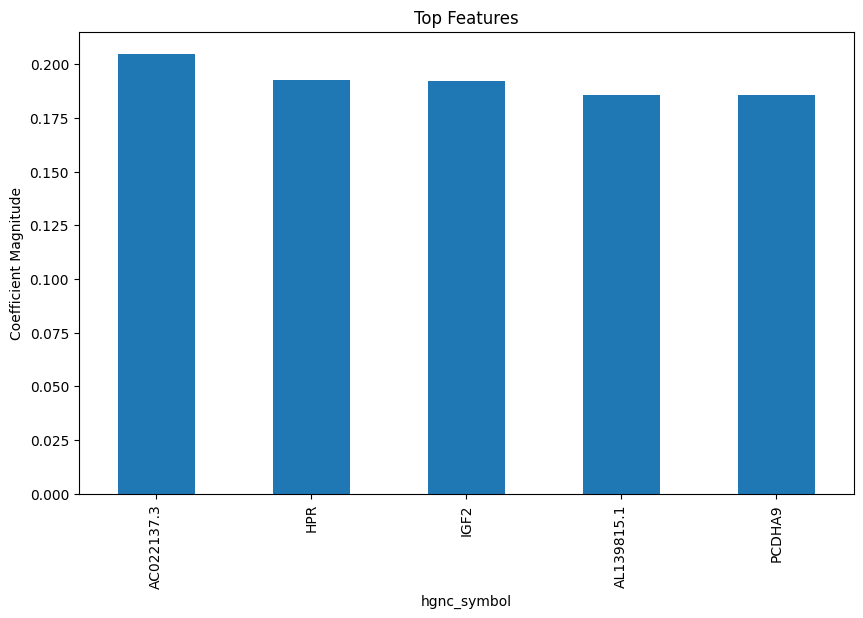

In [345]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))  # adjust the size of the figure as needed
top_features.plot(kind='bar')
plt.title('Top Features')
plt.ylabel('Coefficient Magnitude')
plt.show()


In [357]:
# Known gene
baseline_genes = ['APOE','APP', 'PSEN1', 'MAPT', 'PLD3']  # add more known genes to this list
top_features1 = top_features

# Add coefficients of known genes to the top_features
for gene in baseline_genes:
    ensembl_id = ETG[ETG['hgnc_symbol'] == gene]['ensembl_gene_id'].values[0]  # get the Ensembl ID of the gene
    coef = coef_series[ensembl_id]  # get the coefficient of the gene
    top_features1[gene] = coef  # add the gene and its coefficient to the top_features


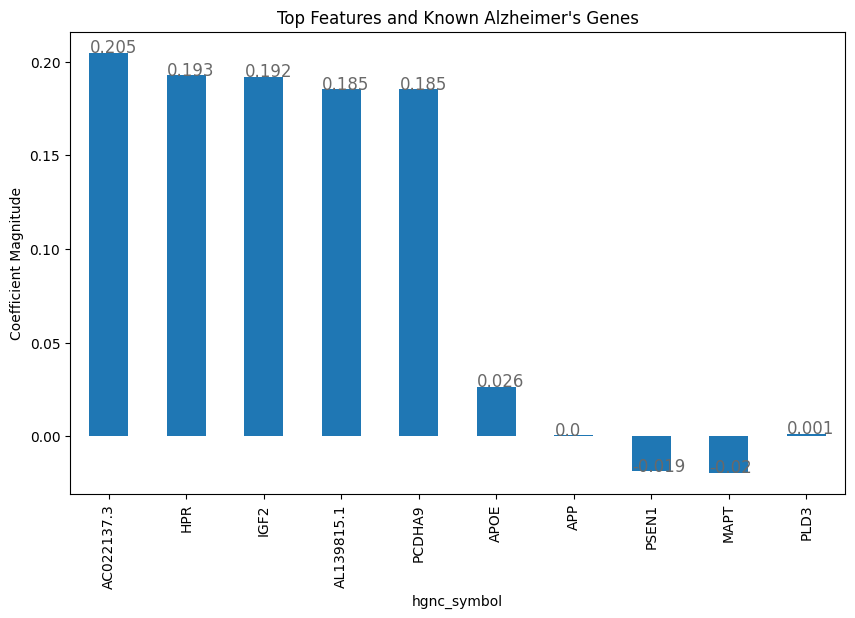

In [359]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))  # adjust the size of the figure as needed
top1_features.plot(kind='bar', ax=ax)
plt.title('Top Features and Known Alzheimer\'s Genes')
plt.ylabel('Coefficient Magnitude')

for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    
plt.show()


In [382]:
sorted_features1_df = sorted_features1.reset_index()

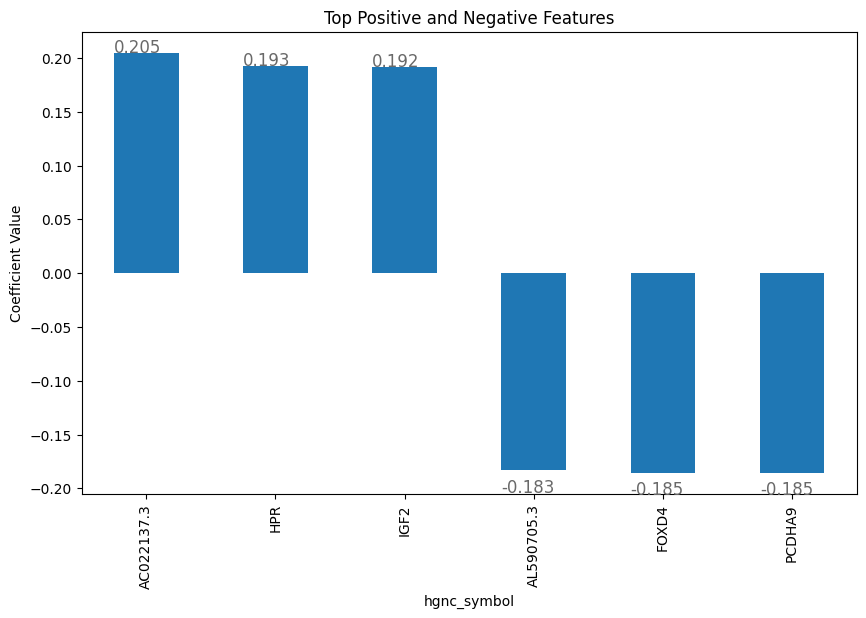

In [390]:
# Convert Series to DataFrame
coef_series_sorted_df = coef_series_sorted.reset_index()

# Rename the columns of sorted_features_df for the merge operation
coef_series_sorted_df.columns = ['ensembl_gene_id', 'coef']

# Merge with the df_hgnc to get the corresponding hgnc_symbol
merged_df1 = pd.merge(coef_series_sorted_df, ETG, on='ensembl_gene_id', how='left')

# Set 'hgnc_symbol' as index
merged_df1.set_index('hgnc_symbol', inplace=True)

# Get the top n positive features and top n negative features
top_positive_features = merged_df1['coef'].head(3)
top_negative_features = merged_df1['coef'].tail(3)

# Concatenate these series together
top_features2 = pd.concat([top_positive_features, top_negative_features])

# Plot the bar graph
ax = top_features2.plot(kind='bar', figsize=(10, 6))

# Add the values on top of each bar
for i in ax.patches:
    # Place the label at the top of the bar for positive coefficients, bottom for negative
    if i.get_height() > 0:
        ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    else:
        ax.text(i.get_x(), i.get_height()-0.02, round(i.get_height(), 3), fontsize=12, color='dimgrey')

plt.title('Top Positive and Negative Features')
plt.ylabel('Coefficient Value')
plt.show()


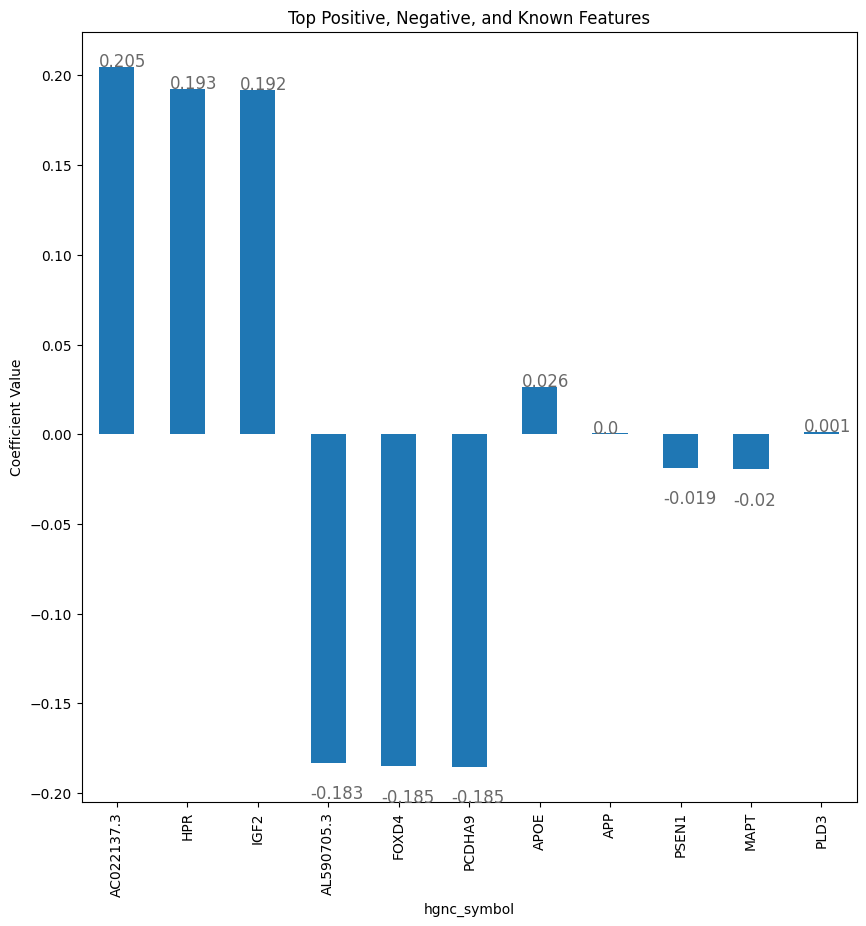

In [396]:
# Get the top 2 positive features and top 2 negative features
top_positive_features = merged_df1['coef'].head(3)
top_negative_features = merged_df1['coef'].tail(3)

# Concatenate these series together
top_features2 = pd.concat([top_positive_features, top_negative_features])

# Known gene
baseline_genes = ['APOE','APP', 'PSEN1', 'MAPT', 'PLD3']  # add more known genes to this list

# Add coefficients of known genes to the top_features
for gene in baseline_genes:
    ensembl_id = ETG[ETG['hgnc_symbol'] == gene]['ensembl_gene_id'].values[0]  # get the Ensembl ID of the gene
    coef = coef_series[ensembl_id]  # get the coefficient of the gene
    top_features2[gene] = coef  # add the gene and its coefficient to the top_features2

# Plot the bar graph
ax = top_features2.plot(kind='bar', figsize=(10, 10))

# Add the values on top of each bar
for i in ax.patches:
    # Place the label at the top of the bar for positive coefficients, bottom for negative
    if i.get_height() > 0:
        ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    else:
        ax.text(i.get_x(), i.get_height()-0.02, round(i.get_height(), 3), fontsize=12, color='dimgrey')

plt.title('Top Positive, Negative, and Known Features')
plt.ylabel('Coefficient Value')
plt.show()


In [374]:
ls1 = df.columns.tolist()

In [376]:
print(ls1)

['feature', '510_120515', '207_120424', '81_120417', '649_120529', '487_120515', '182_120424', '193_120424', '694_120605', '366_120502', '52_120416', '522_120515', '493_120515', '602_120523', '634_120524', '653_120529', '391_120503', '453_120507', '371_120502', '414_120503', '102_120418', '641_120524', '111_120418', '600_120523', '188_120424', '321_120501', '547_120516', '130_120419', '305_120430', '668_120530', '555_120517', '679_120604', '318_120501', '112_120418', '689_120604', '418_120507', '589_120522', '216_120425', '654_120529', '619_120524', '358_120502', '312_120430', '624_120524', '576_120521', '410_120503', '274_120430', '408_120503', '76_120417', '340_120501', '288_120430', '222_120425', '234_120425', '578_120521', '46_120416', '477_120514', '683_120604', '39_120416', '309_120430', '121_120418', '405_120503', '482_120514', '607_120523', '565_120517', '120_120418', '507_120515', '260_120426', '273_120430', '524_120515', '556_120517', '113_120418', '160_120423', '698_120605',